Variables to be updated/configured:

In [1]:
INFO_DIR = "network_info" # path to directory with information on each gene/node in the multiplex network
FIGURES_DIR = "figures" # path to directory where figures will the saved (creates the directory if it doesn't exist)
TABLES_DIR = "tables" # path to directory containing .csv files representing tables (creates the directory if it doesn't exist)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np
import os
import pandas as pd

In [3]:
if not os.path.exists(TABLES_DIR):
    os.makedirs(TABLES_DIR)
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)

In [4]:
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [5]:
info_wes_df = pd.read_csv(os.path.join(INFO_DIR, 'info_wes_df.csv'))
info_df = pd.read_csv(os.path.join(INFO_DIR, 'info_df.csv'))
info_wes = info_wes_df[['gene', 'module_multiplex']].rename(columns={'module_multiplex': 'module_multiplex_wes'})
info_df = info_df.merge(info_wes, on='gene', how='left')
info_df['average_degree'] = (info_df['ppi_degree'] + info_df['phenotype_degree']) / 2
info_df['average_bc'] = (info_df['ppi_betweenness'] + info_df['phenotype_betweenness']) / 2

# Generates part of Supplemental Tables 2 and 3

In [6]:
temp = []
for mod in range(1, 15):
    mod_df = info_df[info_df['module_multiplex']==mod]
    e1_genes = ', '.join(list(mod_df[mod_df['e1']==1]['gene']))
    e2_genes = ', '.join(list(mod_df[mod_df['e2']==1]['gene']))
    e3_genes = ', '.join(list(mod_df[mod_df['e3']==1]['gene']))
    e4_genes = ', '.join(list(mod_df[mod_df['e4']==1]['gene']))
    a1_genes = ', '.join(list(mod_df[mod_df['a1']==1]['gene']))
    a2_genes = ', '.join(list(mod_df[mod_df['a2']==1]['gene']))
    a3_genes = ', '.join(list(mod_df[mod_df['a3']==1]['gene']))
    as_genes = ', '.join(list(mod_df[mod_df['as']==1]['gene']))
    common_all = ', '.join(list(mod_df[mod_df['common_all']==1]['gene']))
    common_hc = ', '.join(list(mod_df[mod_df['common']==1]['gene']))
    temp.append([mod, len(mod_df), e1_genes, e2_genes, e3_genes, e4_genes, a1_genes, a2_genes, a3_genes, as_genes, common_all, common_hc])
df = pd.DataFrame(temp)
df.to_csv(os.path.join(TABLES_DIR, 'supplemental_table.csv'), index=False)

In [7]:
temp = []
for mod in range(1, 15):
    mod_df = info_wes_df[info_wes_df['module_multiplex']==mod]
    
    e1_genes = ', '.join(list(mod_df[mod_df['e1']==1]['gene']))
    e2_genes = ', '.join(list(mod_df[mod_df['e2']==1]['gene']))
    e3_genes = ', '.join(list(mod_df[mod_df['e3']==1]['gene']))
    e4_genes = ', '.join(list(mod_df[mod_df['e4']==1]['gene']))
    a1_genes = ', '.join(list(mod_df[mod_df['a1']==1]['gene']))
    a2_genes = ', '.join(list(mod_df[mod_df['a2']==1]['gene']))
    a3_genes = ', '.join(list(mod_df[mod_df['a3']==1]['gene']))
    as_genes = ', '.join(list(mod_df[mod_df['as']==1]['gene']))
    
    common_all = ', '.join(list(mod_df[mod_df['common_all']==1]['gene']))
    common_hc = ', '.join(list(mod_df[mod_df['common']==1]['gene']))
    
    temp.append([mod, len(mod_df), e1_genes, e2_genes, e3_genes, e4_genes, a1_genes, a2_genes, a3_genes, as_genes, common_all, common_hc])
df = pd.DataFrame(temp)
df.to_csv(os.path.join(TABLES_DIR, 'supplemental_table_wes.csv'), index=False)

# Gene prioritization

In [8]:
m3 = info_df[info_df['module_multiplex']==3]
m3_genes = set(m3['gene'])
m6 = info_df[info_df['module_multiplex']==6]
m6_genes = set(m6['gene'])

m2_wes = info_wes_df[info_wes_df['module_multiplex']==2]
m2_wes_genes = set(m2_wes['gene'])
m7_wes = info_wes_df[info_wes_df['module_multiplex']==7]
m7_wes_genes = set(m7_wes['gene'])

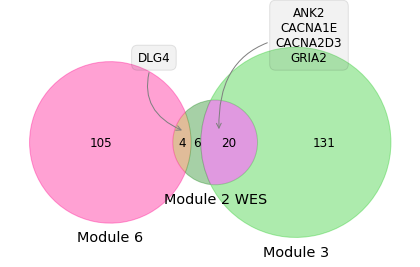

In [9]:
# venn diagram of epilepsy- and autism-associated genes
v = venn3([ m2_wes_genes, m6_genes, m3_genes], set_labels = ('Module 2 WES', 'Module 6', 'Module 3'))
v.get_patch_by_id('010').set_color('deeppink')
v.get_patch_by_id('001').set_color('limegreen')
v.get_patch_by_id('100').set_color('forestgreen')

plt.annotate('DLG4', xy=v.get_label_by_id('010').get_position() + np.array([0.37, 0.05]), xytext=(-30,+70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.annotate('ANK2\nCACNA1E\nCACNA2D3\nGRIA2', xy=v.get_label_by_id('100').get_position() + np.array([0.1, 0.05]), xytext=(+90,+70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

plt.tight_layout()
plt.savefig(FIGURES_DIR + "/venn_diagram_prioritize.png", dpi=600)

### Generates Table 2 and 3

In [10]:
m3.sort_values(by='average_degree', ascending=False).head(20)[['gene', 'ppi_degree', 'phenotype_degree', 'annotated_type']].to_csv(os.path.join(TABLES_DIR, 'm3_degree.csv'), index=False)
m3.sort_values(by='average_bc', ascending=False).head(20)[['gene', 'ppi_betweenness', 'phenotype_betweenness', 'annotated_type']].to_csv(os.path.join(TABLES_DIR, 'm3_bc.csv'), index=False)
m6.sort_values(by='average_degree', ascending=False).head(20)[['gene', 'ppi_degree', 'phenotype_degree', 'annotated_type']].to_csv(os.path.join(TABLES_DIR, 'm6_degree.csv'), index=False)
m6.sort_values(by='average_bc', ascending=False).head(20)[['gene', 'ppi_betweenness', 'phenotype_betweenness', 'annotated_type']].to_csv(os.path.join(TABLES_DIR, 'm6_bc.csv'), index=False)
